# 2. Further EDA and Preprocessing

## 2.1 Imports

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('hotel_reviews_structured.csv')

In [3]:
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [25]:
df.shape

(9405, 4)

## 2.2 Checking Frequency of Words and Phrases in Review Summaries

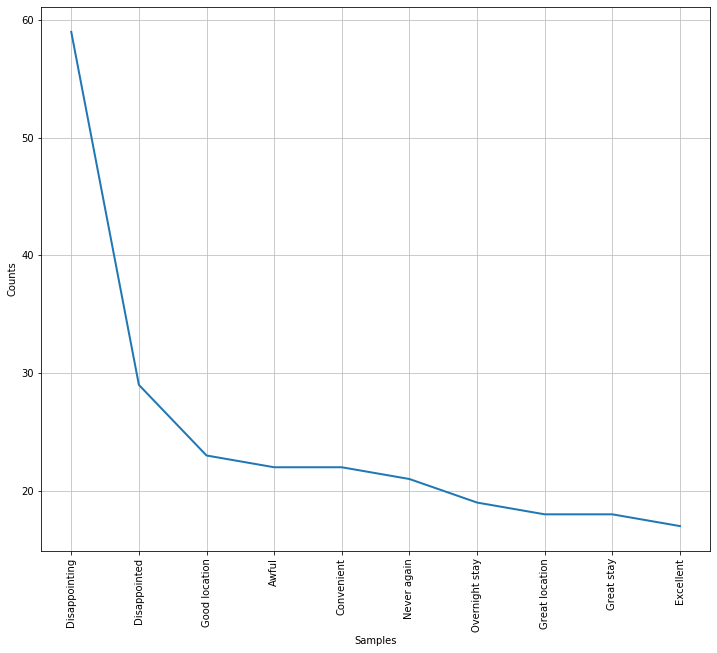

In [33]:
plt.figure(figsize=(12,10))
FreqDist(df['review_summary'].values.tolist()).plot(10)
plt.show()

## 2.3 Flattening Our Data

In [24]:
df['review'][0:3].to_list()

["Its hard to find words that can describe this experience without being too dismissive so i'll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit 'run down'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID!",
 'Absolutely terrible. Cracked ceiling, tiny room, bad quality t

In [47]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+') 
tokenized_reviews = tokenizer.tokenize(str(df['review'].values))

for review in tokenized_reviews:
    flat_list_reviews.append(review)

## 2.4 Checking Frequency of Words and Phrases in Reviews

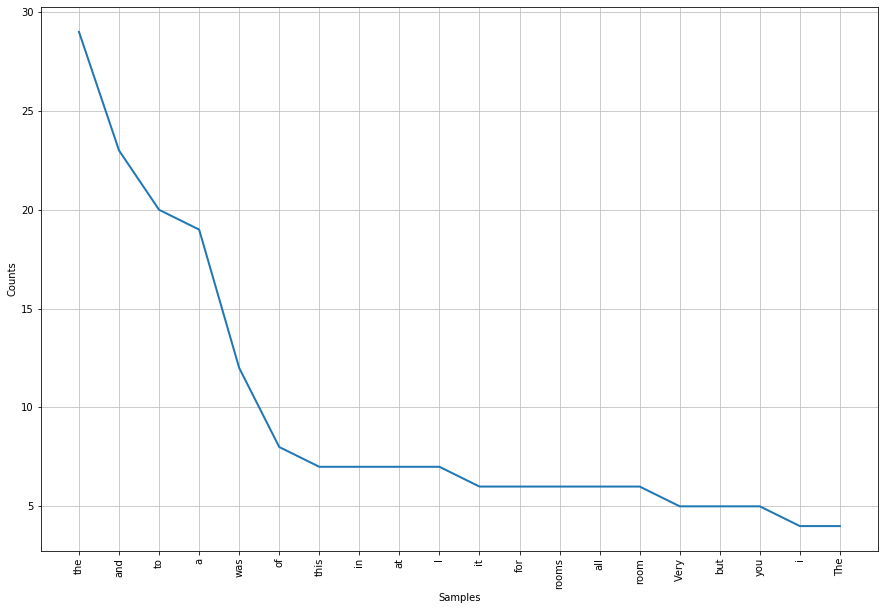

In [48]:
plt.figure(figsize=(15,10))
FreqDist(flat_list_reviews).plot(20)
plt.show()

In [50]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [51]:
def apply_stem(doc):
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
    return stem_doc

def apply_lem(doc):
    doc_split = doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='n') + ' '
        
    return lem_doc

In [53]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

In [88]:
print("ORIGINAL:",'\n',df['review'].iloc[130],'\n')
print("STEMMED:",'\n',df['review_stemmed'].iloc[130],'\n')
print("LEMMED:",'\n',df['review_lemmed'].iloc[130],'\n')

ORIGINAL: 
 Very dated, worn hotel. Our room was shabby and grubby and had an unpleasant smell, and the bed was really uncomfortable.   We had clearly disturbed the check in clerk’s chat with her friends when we arrived as she was very abrupt with us.   Some aspects of the room had obviously not been thought out -  The tea/coffee tray was not positioned anywhere near an electrical socket. The bedside shelves were the size of a postage stamp.  There were no drawers or shelves for folded clothes.  There was no towel rail in the bathroom.   Breakfast was quite poor with many items not replenished.   Hilton need to do better.   There are too many much better hotels in Croydon for me to ever want to stay here again. 

STEMMED: 
 veri dated, worn hotel. our room wa shabbi and grubbi and had an unpleas smell, and the bed wa realli uncomfortable.   We had clearli disturb the check in clerk’ chat with her friend when we arriv as she wa veri abrupt with us.   some aspect of the room had obvious 

In [65]:
df.head()

,hotel_name,review_summary,score,review,review_stemmed,review_lemmed
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo...","absolut terrible. crack ceiling, tini room, ba...","Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...,veri disappoint firstli i check in onlin but h...,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...,first of all we arriv want to park at the hote...,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole...","hello, I current stay @ hilton metropol in lo...","Hello, I currently staying @ Hilton Metropole..."


In [69]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['hotel_name','score']), 
                                                    df['score'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7524, 4)
(1881, 4)
(7524,)
(1881,)


In [72]:
stop_words = set(stopwords.words("english"))

In [83]:
tf_idf_vect = TfidfVectorizer(lowercase=True, tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, ngram_range=(1,3),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,access,air,airport,also,although,always,another,area,around,arrival,...,used,walk,water,way,well,went,wifi,work,would,year
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.153671,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.195528,0.0
2,0.0,0.0,0.151241,0.156362,0.197274,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.296721,0.0,0.0,0.148451,0.0,0.0,0.0,0.116267,0.0
3,0.0,0.0,0.159841,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.191877,0.000000,0.0,0.0,0.0,0.226493,0.0,...,0.246549,0.364115,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
COUNT VECTORIZER?

In [84]:
for i, col in enumerate(x_lemm_train_tfidf.columns):
    print(i, col)

0 access
1 air
2 airport
3 also
4 although
5 always
6 another
7 area
8 around
9 arrival
10 arrived
11 asked
12 away
13 back
14 bad
15 bar
16 bathroom
17 bed
18 best
19 better
20 big
21 bit
22 booked
23 booking
24 breakfast
25 buffet
26 business
27 busy
28 car
29 carpet
30 check
31 checked
32 choice
33 clean
34 close
35 comfortable
36 convenient
37 could
38 dated
39 day
40 desk
41 dirty
42 door
43 drink
44 due
45 early
46 easy
47 enough
48 even
49 evening
50 everything
51 excellent
52 executive
53 expect
54 expensive
55 experience
56 family
57 find
58 first
59 flight
60 floor
61 food
62 found
63 free
64 friendly
65 front
66 gatwick
67 get
68 given
69 going
70 good
71 got
72 great
73 guest
74 helpful
75 hilton
76 holiday
77 hotel
78 hour
79 however
80 large
81 last
82 like
83 little
84 lobby
85 location
86 london
87 long
88 look
89 lot
90 lounge
91 lovely
92 made
93 make
94 many
95 member
96 minute
97 money
98 morning
99 much
100 need
101 never
102 new
103 next
104 nice
105 night
106 noi